In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("diabetesLogistic.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA 

In [7]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

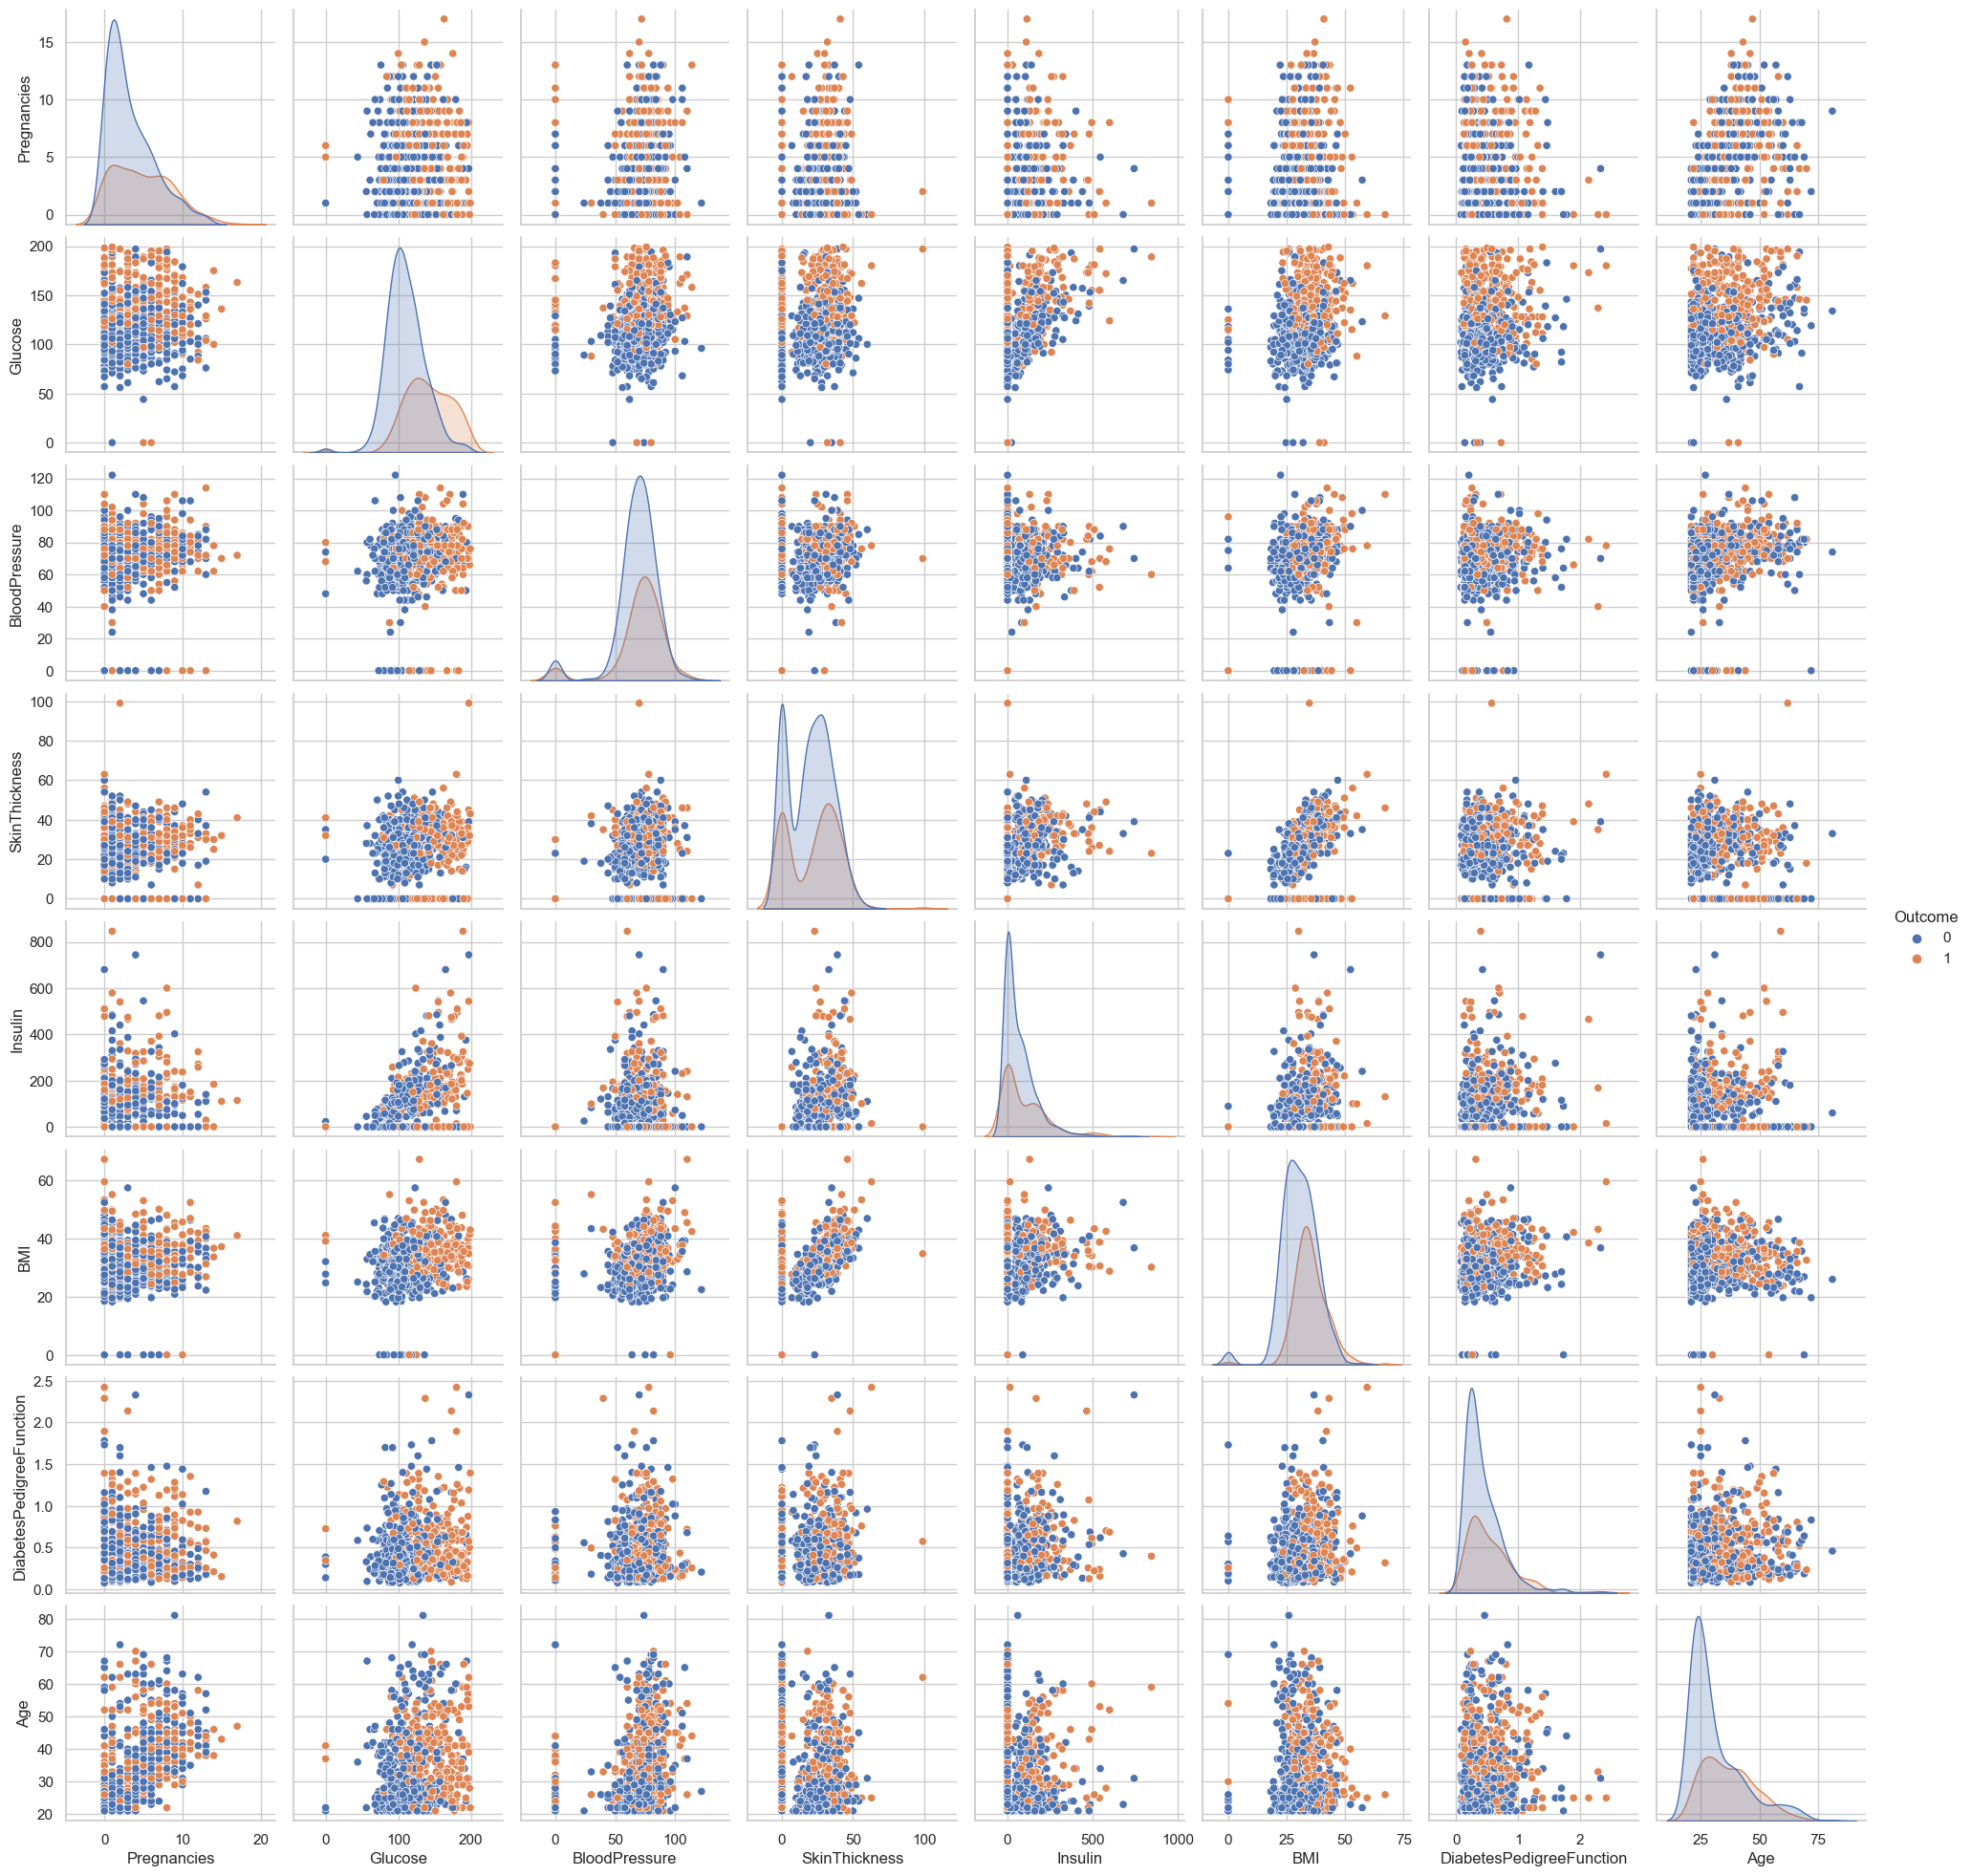

In [21]:
sns.pairplot(df,hue='Outcome')

In [27]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

## Sampling

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
train_df, test_df = train_test_split(df,test_size=0.2)

In [32]:
print(df.shape," ", train_df.shape," ",test_df.shape)

(768, 9)   (614, 9)   (154, 9)


In [38]:
train_df_x = train_df.iloc[:,:-1]
train_df_y = train_df.iloc[:,-1]

In [39]:
test_df_x = test_df.iloc[:,:-1]
test_df_y = test_df.iloc[:,-1]

## Model Building

 * Define Model parameters to tune

In [34]:
model_parameters = {'n_estimators' : [2,4,6,8,10],    # the number of tress
                   'max_depth': [2,3,4],              # maximu branches in tree
                   'learning_rate':[0.8,0.6],         
                   'min_samples_leaf':[100,200,270],  #child 
                   'min_samples_split':[50,70,80]}

## Grid Search

 * Gridsearch the parameter to find the best parameters.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=10, loss='deviance',criterion='squared_error')

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
gscv = GridSearchCV(estimator=gbc,
                   param_grid = model_parameters,
                   cv = 10,
                   verbose = 1,
                   n_jobs=-1,
                   scoring='accuracy')

In [41]:
gscv.fit(train_df_x,train_df_y)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3, 4],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 6, 8, 10]},
             scoring='accuracy', verbose=1)

In [42]:
print("The best parameters :", gscv.best_params_)

The best parameters : {'learning_rate': 0.8, 'max_depth': 2, 'min_samples_leaf': 200, 'min_samples_split': 50, 'n_estimators': 8}


## Re-fit the model with the Best parameters

In [43]:
final_model = GradientBoostingClassifier(**gscv.best_params_)

In [44]:
final_model.fit(train_df_x,train_df_y)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, min_samples_leaf=200,
                           min_samples_split=50, n_estimators=8)

### Prediction

In [45]:
train_pred = final_model.predict(train_df_x)
test_pred = final_model.predict(test_df_x)

In [46]:
train_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,

## Confusion Matrix on Train Data

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
print(confusion_matrix(train_df_y,train_pred))

[[333  61]
 [ 80 140]]


In [49]:
print(classification_report(train_df_y,train_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       394
           1       0.70      0.64      0.67       220

    accuracy                           0.77       614
   macro avg       0.75      0.74      0.75       614
weighted avg       0.77      0.77      0.77       614



## Confusion Matrix on Test Data

In [50]:
print(confusion_matrix(test_df_y,test_pred))

[[86 20]
 [17 31]]


In [51]:
print(classification_report(test_df_y,test_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       106
           1       0.61      0.65      0.63        48

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.76      0.76      0.76       154



## Important Features

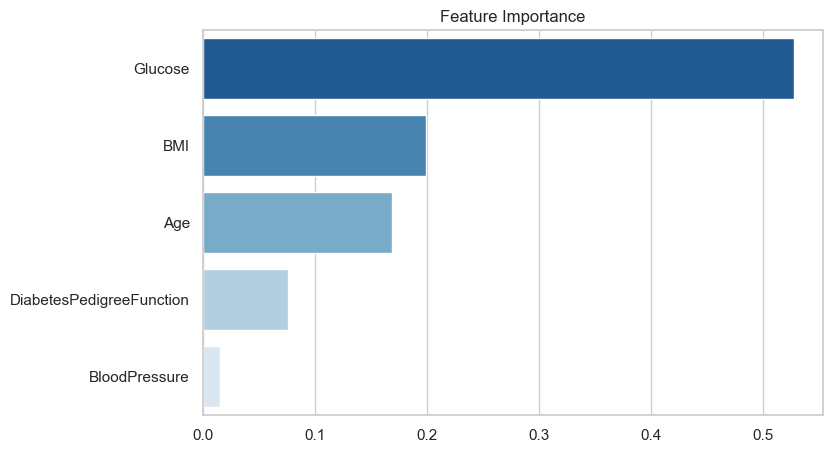

In [52]:
imp = pd.Series(data = final_model.feature_importances_,index=final_model.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature Importance")
ax = sns.barplot(y = imp.head().index, x = imp.head().values, palette ="Blues_r", orient = 'h' )

In [56]:
x = df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47
